In [2]:
from selenium import webdriver
import pandas as pd
import numpy as np
from selenium.webdriver.firefox.options import Options
import time

options = Options()
options.headless = True


## scrapper 

In [3]:
da = pd.read_csv('../links.csv')
url_list = da['url'].tolist() 

In [ ]:
myDict1 = {}
start_time = time.time()
  
for page_num in range(0, 2):
    print(page_num,end = " ")
    browser = webdriver.Firefox( executable_path="./drivers/geckodriver")
    browser.get(url_list[page_num])
    browser.find_element_by_partial_link_text("More Details...").click()
    title = browser.find_element_by_id('bookTitle').text
    author = browser.find_element_by_class_name("authorName").text 
    avg_rating = browser.find_element_by_xpath("/html/body/div[2]/div[3]/div[1]/div[2]/div[4]/div[1]/div[2]/div[2]/span[2]").text
    num_rating = browser.find_element_by_xpath("/html/body/div[2]/div[3]/div[1]/div[2]/div[4]/div[1]/div[2]/div[2]/a[2]").text
    num_review = browser.find_element_by_xpath("/html/body/div[2]/div[3]/div[1]/div[2]/div[4]/div[1]/div[2]/div[2]/a[3]").text
    details = browser.find_element_by_id("details")
    temp1 = details.text.split("\n")
    
    page = 0
    series = 0
    
    # num rating
    try:
        num_ratings = num_rating.split()[0]
    except:
        num_ratings = 0
    
    # num review
    try:
        num_reviews = num_review.split()[0]
    except:
        num_reviews = 0

    places = np.nan
    awards = np.nan

    # total_pages
    try:
        num_pages = [int(s) for s in temp1[0].split() if s.isdigit()]
        num_pages = str(total_pages[0])
    except IndexError:
        num_pages = np.nan

    # year
    try:
        year = [int(s) for s in temp1[1].split() if s.isdigit()]
        original_publish_year = str(year[0]) 
    except IndexError:
        original_publish_year = np.nan

    # places
    for i in range(len(temp1)):
        if(temp1[i]=="Setting"):
            places = temp1[i+1]
        
    # series
    for i in range(len(temp1)):
        if(temp1[i] == "Series"):
            series = 1

    # Awards
    for i in range(len(temp1)):
        if(temp1[i] == "Literary Awards"):
            awards = temp1[i+1]
    
    # genre
    genre = browser.find_elements_by_css_selector("div.left>a.bookPageGenreLink")
    temp2 = [i.text for i in genre]

    try:
        genres = temp2[0:3]
    except IndexError:
        genres = np.nan

    myDict1[page_num] = (url_list[page_num],title, author, avg_rating, num_ratings,  num_reviews,  num_pages, original_publish_year, places, series, awards, genres)
    browser.close()

print("time taken: %s seconds ---" % (time.time() - start_time))
df = pd.DataFrame.from_dict(myDict1, orient='index', columns=['url','title', 'author', 'num_reviews', 'num_ratings', 'avg_rating',  'num_pages', 'original_publish_year', 'series', 'genres', 'awards', 'places'])
df.to_csv('filename.csv')

In [42]:
df

,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places
0,https://www.goodreads.com//book/show/13496.A_G...,A Game of Thrones,George R.R. Martin,4.44,"2,084,674","55,510",1,2005,The Lands of Ice and Fire,1,"Nebula Award Nominee for Best Novel (1997), Lo...","[Fantasy, Fiction, Fantasy]"
1,https://www.goodreads.com//book/show/30.J_R_R_...,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.60,"114,607","1,837",1,2012,Middle-earth,1,NaN,"[Fantasy, Fiction, Classics]"


In [3]:
df = pd.read_csv('final_01.csv')


## checking and correcting according to given constrainst

In [50]:
# remove first because it is  added 

df.dtypes


Unnamed: 0                 int64
url                       object
title                     object
author                    object
num_reviews                int64
num_ratings                int64
avg_rating               float64
num_pages                float64
original_publish_year    float64
series                      bool
genres                    object
awards                    object
places                    object
dtype: object

In [18]:
dfn = df.convert_dtypes()
dfn.dtypes

Unnamed: 0                 Int64
url                       string
title                     string
author                    string
num_reviews                Int64
num_ratings                Int64
avg_rating               Float64
num_pages                  Int64
original_publish_year      Int64
series                   boolean
genres                    string
awards                    string
places                    string
dtype: object

In [8]:
dfn['series'].dtype

BooleanDtype

In [9]:
dfn['series'] = dfn['series'].astype('bool')

In [10]:
dfn.to_csv('final_01.csv')

In [19]:
dfn.dtypes

Unnamed: 0                 Int64
url                       string
title                     string
author                    string
num_reviews                Int64
num_ratings                Int64
avg_rating               Float64
num_pages                  Int64
original_publish_year      Int64
series                   boolean
genres                    string
awards                    string
places                    string
dtype: object

## infos about data

In [21]:
df2 = dfn
df2.describe(include='all')

,Unnamed: 0,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places
count,1000.000000,1000,1000,1000,1000.0000,1.000000e+03,1000.000000,983.000000,992.000000,1000,1000,395,235
unique,NaN,1000,998,415,NaN,NaN,NaN,NaN,NaN,2,177,370,152
top,NaN,https://www.goodreads.com//book/show/12954620-...,The Summoner,David Eddings,NaN,NaN,NaN,NaN,NaN,True,"['Fantasy', 'Fiction', 'Fantasy']",Margaret A. Edwards Award (2013),Tortall
freq,NaN,1,2,22,NaN,NaN,NaN,NaN,NaN,888,244,5,8
mean,499.500000,NaN,NaN,NaN,4538.7870,1.200786e+05,4.108150,494.814852,2003.118952,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,12569.5652,4.697256e+05,0.264131,298.507595,64.290790,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.0000,4.000000e+00,3.180000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,249.750000,NaN,NaN,NaN,112.5000,2.883250e+03,3.947500,337.000000,2001.000000,NaN,NaN,NaN,NaN
50%,499.500000,NaN,NaN,NaN,570.0000,1.552400e+04,4.100000,441.000000,2006.000000,NaN,NaN,NaN,NaN
75%,749.250000,NaN,NaN,NaN,2847.7500,7.002600e+04,4.260000,592.000000,2012.000000,NaN,NaN,NaN,NaN


In [44]:
df3 = df2.describe(include='all')
df4 = df2.isna().any()
#df4
#df3.to_csv('info_about_original_data.csv')


## preprocessing

In [56]:
df2['awards'].isna().any()
df5 = df2 
df5['Awards_count'] = df5.awards.str.count(',')+1


In [59]:
df5['Awards_count'] =df5['Awards_count'].fillna(value=0) 
df5['Awards_count']

0      4
1      0
2      5
3      4
4      0
      ..
995    0
996    0
997    0
998    0
999    5
Name: Awards_count, Length: 1000, dtype: Int64

You know that a lot of reviews have a value between 4 and 5, and it is very hard to spot a difference between the different ratings. For this reason, you have to transform the avg_ratings column using the following criteria:

In [63]:
df5['avg_rating'].isna().any()

False

## Min -Max normalisation
x' =\frac{ x - \min(x)}{\max(x) - \min(x)}

In [6]:
df = pd.read_csv('final_01.csv')
df1 = df
#df1.head()

In [7]:
max_min_value = df['avg_rating'].max() - df['avg_rating'].min()
min_value = df['avg_rating'].min()
df1['minmax_norm_ratings'] = 1 + (df1['avg_rating'] - min_value) / (max_min_value) * 9
df1['minmax_norm_ratings']

0      7.230769
1      8.021978
2      7.626374
3      8.071429
4      6.340659
         ...   
995    5.153846
996    2.780220
997    3.571429
998    4.560440
999    7.181319
Name: minmax_norm_ratings, Length: 1000, dtype: float64

## mean normalization:

x' = \frac{x - \mathrm{average}(x)}{\max(x)-\min(x)}

In [8]:
max_min_value = df1['avg_rating'].max() - df1['avg_rating'].min()
mean_value = df1['avg_rating'].mean()

df1['mean_norm_ratings'] = 1 + (df1['avg_rating'] - mean_value) / (max_min_value) * 9
df1['mean_norm_ratings'] 

0      2.641016
1      3.432225
2      3.036621
3      3.481676
4      1.750907
         ...   
995    0.564093
996   -1.809533
997   -1.018324
998   -0.029313
999    2.591566
Name: mean_norm_ratings, Length: 1000, dtype: float64

## Analyse

Once you have preprocessed your dataframe, you can play with it! 

1. Group the books by `original_publish_year` and get the mean of the `minmax_norm_ratings` of the groups.
2. Create a function that given an author as input it returns her/his book with the highest `minmax_norm_ratings`.

In [9]:
df2 = df1


In [10]:
#df2.dropna(inplace=True)
df2['original_publish_year'].dropna(inplace=True) 
df2['original_publish_year'].nunique()


50

In [11]:
df2.columns



Index(['Unnamed: 0', 'url', 'title', 'author', 'num_reviews', 'num_ratings',
       'avg_rating', 'num_pages', 'original_publish_year', 'series', 'genres',
       'awards', 'places', 'minmax_norm_ratings', 'mean_norm_ratings'],
      dtype='object')

<class 'pandas.core.series.Series'>


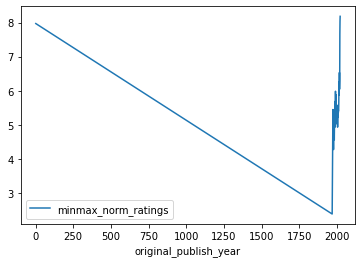

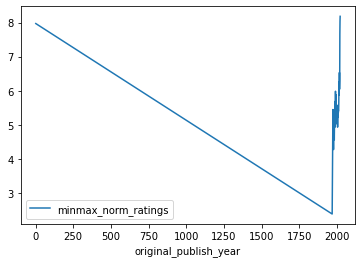

In [12]:
# task1
print(type(df2.groupby(['original_publish_year'])['minmax_norm_ratings'].mean())) #mean()
s = df2.groupby(['original_publish_year'])['minmax_norm_ratings'].mean()
df3 = s.to_frame() #.T
#print(type(df3))
df3.plot().get_figure()

In [165]:
#import matplotlib.pyplot as plt
#plt.boxplot(df3)
#.columns #original_publish_year.hist()


<AxesSubplot:xlabel='original_publish_year'>

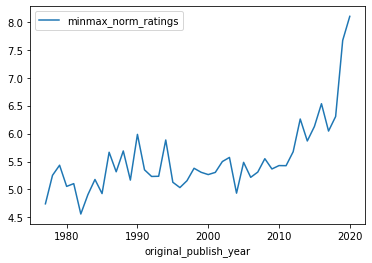

In [13]:
## good
min_1 = df2['original_publish_year'].quantile(0.01)
min_2 = df2['original_publish_year'].quantile(0.99)
df2['original_publish_year'] = np.where(df2['original_publish_year'] < min_1, min_1,df2['original_publish_year'])
df2['original_publish_year'] = np.where(df2['original_publish_year'] > min_2, min_2,df2['original_publish_year'])
s = df2.groupby(['original_publish_year'])['minmax_norm_ratings'].mean()
df3 = s.to_frame()
df3.plot()  # .get_figure()

In [14]:
# using pivot table
ratings_per_publication_year = pd.pivot_table(data=df2, index='original_publish_year', values='minmax_norm_ratings', aggfunc=np.mean)
ratings_per_publication_year.columns

Index(['minmax_norm_ratings'], dtype='object')

In [29]:
# task2
def func_mean_minmax_norm_ratings(authorname, dataframe):
    f=df2[df2.loc[:,'author'] == 'J.K. Rowling']
    desired_book = f[f.loc[:,'minmax_norm_ratings']== f['minmax_norm_ratings'].max()]
    return desired_book.title

bookname = func_mean_minmax_norm_ratings('J.K. Rowling',df2)

In [28]:
print(bookname)

582    Harry Potter and the Deathly Hallows
Name: title, dtype: object


In [30]:
#df2[df2.loc[:,'minmax_norm_ratings'] == bookname]

In [31]:
#f=df2[df2.loc[:,'author'] == 'J.K. Rowling']
#desired_book = f[f.loc[:,'minmax_norm_ratings']== f['minmax_norm_ratings'].max()]
#desired_book.title

In [53]:
#temp = pd.read_csv('info_about_original_data.csv')
#temp